# Hierarchical clustering

Useful links
* https://de.dariah.eu/tatom/working_with_text.html
* https://docs.obspy.org/tutorial/code_snippets/hierarchical_clustering.html

We'll need the matrix generated in the Affinity Propagation example

C:\UserData\takuyai\Miniconda3\envs\lith_nlp\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


41 Unique LithCodes that are not UNKN or numeric
['GRVL' 'CLAY' 'CRSE' 'SHLE' 'BSLT' 'ROCK' 'SAND' 'SOIL' 'GRNT' 'SASH'
 'CGLM' 'SDSN' 'TPSL' 'BLBN' 'COAL' 'SILT' 'LMSN' 'ALVM' 'QRTZ' 'SDCY'
 'LOAM' 'BLDR' 'SLTE' 'SLCY' 'BNST' 'VLCC' 'SLSN' 'BRBN' 'GRBN' 'MDSN'
 'WB' 'TUFF' 'BDRK' 'SNDY' 'SDMN' 'CVTY' 'CLBD' 'FILL' 'DLMT' 'WODY'
 'FINE']
Attempting to fill in 99 unknown MajorLithCode based on provided descriptions


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:33<00:00,  2.99it/s]


After clean up 40 unique LithCodes that are not UNKN or numeric
['GRVL' 'CLAY' 'CRSE' 'SHLE' 'BSLT' 'ROCK' 'SAND' 'SOIL' 'TPSL' 'GRNT'
 'SASH' 'CGLM' 'SDSN' 'COAL' 'SILT' 'LMSN' 'ALVM' 'QRTZ' 'SDCY' 'LOAM'
 'BLDR' 'SLTE' 'SLCY' 'VLCC' 'SLSN' 'BRBN' 'GRBN' 'MDSN' 'WB' 'TUFF'
 'BDRK' 'SNDY' 'SDMN' 'CVTY' 'CLBD' 'FILL' 'DLMT' 'WODY' 'BNST' 'FINE']
(1000,) (1000,)
Number of entries 1000
Dictionary(144 unique tokens: ['bear', 'cement', 'gravel', 'water', 'clay']...)


notebook_setup.ipynb:6: UserWarning: WARNING - Filtering to unique combinations, which may not be desirable in the future!
  "metadata": {},


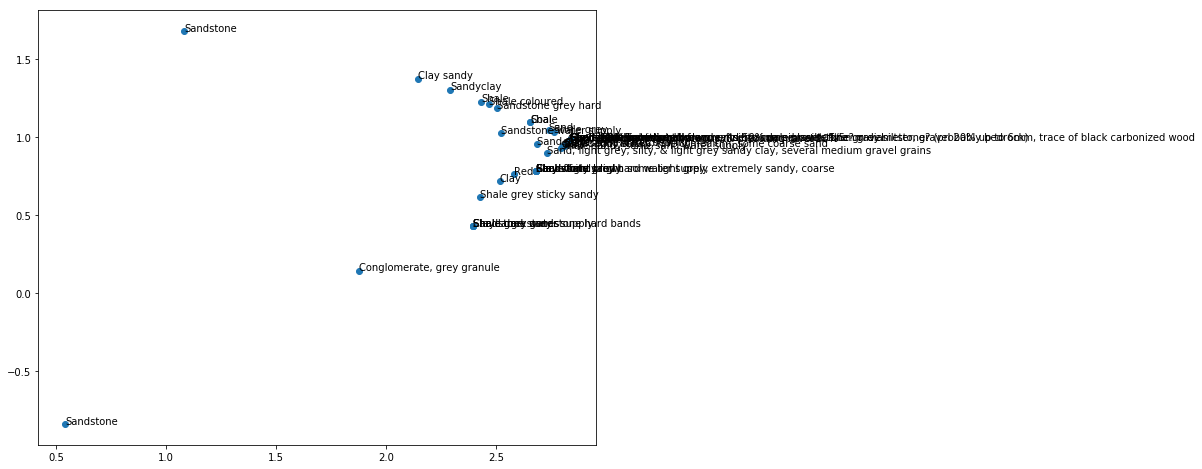

If using amalgamated example dataset, this should be around 560 entries: 1000


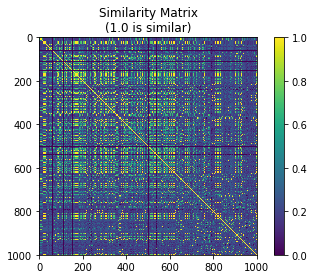

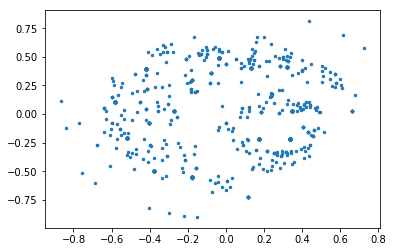

Num clusters: 70


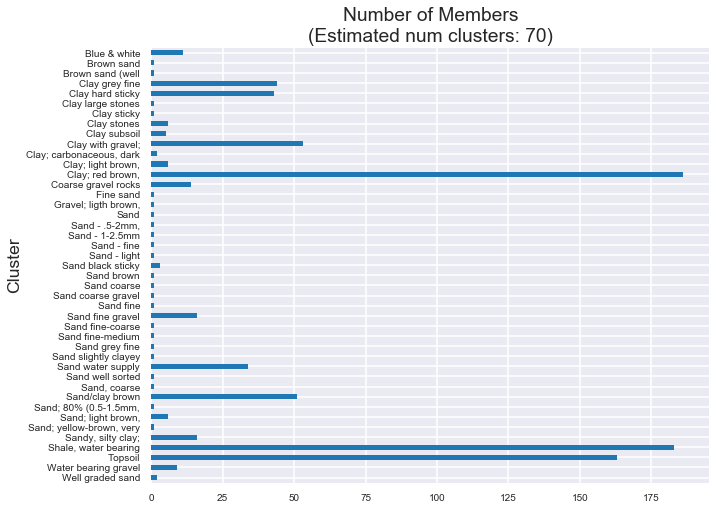

AssertionError: Number of clusters do not match outputted cluster exemplars!

In [1]:
%run "Lith Affinity Prop.ipynb"

# The above runs notebook setup as well

In [7]:
import scipy
from scipy.cluster import hierarchy

In [8]:
from sklearn.manifold import MDS

dis_sim = 1 - token_sim
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dis_sim)

In [9]:
xs, ys = pos[:, 0], pos[:, 1]
names = lith_desc.tolist()

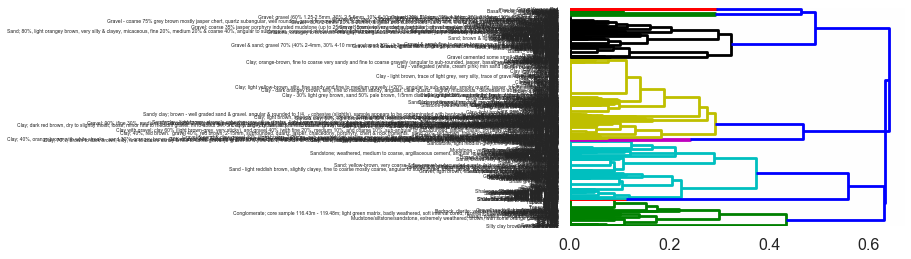

In [10]:
threshold = 0.1
linkage = hierarchy.linkage(pos, method="centroid")
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")
dendro = hierarchy.dendrogram(linkage, labels=names, orientation='right')
                              # truncate_mode='level', p=10) # last two settings tell it to only show the last 'p'
